In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv("/content/bd_sinColDummy.csv")

# Ver resumen
print(df.shape)
print(df.dtypes)
print(df.head())

(560, 10)
name                       object
ratings                   float64
price                     float64
internal_storage(GB)      float64
storage_ram(GB)           float64
expandable_storage(TB)    float64
battery                   float64
vector_camaras             object
vector_display             object
vector_network             object
dtype: object
                                          name  ratings   price  \
0   SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)      4.3  113.99   
1  SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)      4.3  125.99   
2  SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)      4.3  125.99   
3  SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)      4.3  125.99   
4    SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)      4.3  185.99   

   internal_storage(GB)  storage_ram(GB)  expandable_storage(TB)  battery  \
0                  64.0              4.0                     1.0   6000.0   
1                 128.0              4.0                     1.0   6000.0   
2 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['name', 'ratings', 'price', 'internal_storage(GB)', 'storage_ram(GB)', 'expandable_storage(TB)', 'battery', 'vector_camaras', 'vector_display', 'vector_network']


In [ ]:
import ast  # Add this import at the top
import pandas as pd
import numpy as np

def expand_vector(modelo, col_base, prefix):
    """
    Convierte la columna con strings de listas en columnas binarias separadas.
    - col_base: nombre de la columna (ej. 'vector_camaras')
    - prefix  : prefijo para las nuevas columnas (ej. 'cam')
    """
    # 1) Garantizar lista: si el elemento ya es list, lo deja; si es string, lo evalúa
    def to_list(x):
        if isinstance(x, list):
            return x
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []          # si viene vacío o malformado

    modelo[col_base] = modelo[col_base].apply(to_list)

    # 2) Crear DataFrame con columnas expandidas
    ancho = len(modelo[col_base].iloc[0])           # asume mismo largo en todas las filas
    nuevas = pd.DataFrame(modelo[col_base].tolist(),
                          columns=[f'{prefix}_{i}' for i in range(ancho)],
                          index=modelo.index)  # Changed df.index to modelo.index

    # 3) Concatenar y eliminar la original
    resultado = pd.concat([modelo.drop(columns=[col_base]), nuevas], axis=1)  # Changed df to modelo
    return resultado

# Uso - usando la variable 'modelo' que ya existe
df_expandido = expand_vector(df, 'vector_camaras',  'cam')
df_expandido = expand_vector(df_expandido, 'vector_display',  'disp')
df_expandido = expand_vector(df_expandido, 'vector_network',  'net')

print("Columnas totales:", df_expandido.shape[1])
df_expandido.head()

Columnas totales: 48


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
df = df_expandido
df.dtypes

,0
name,object
ratings,float64
price,float64
internal_storage(GB),float64
storage_ram(GB),float64
expandable_storage(TB),float64
battery,float64
cam_0,int64
cam_1,int64
cam_2,int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error


# OBJETIVOS:
# - Clasificar productos como Élite, Estándar o Económico según precio.
# - Estimar el precio ideal para un producto según sus características.

print("Dataset cargado. Tamaño:", df.shape)
print("Columnas:", df.columns.tolist())

# Crear columna de categoría a partir del precio
df['categoria'] = pd.qcut(df['price'], q=4, labels=['bajo', 'medio bajo', 'medio alto', 'Élite'])

print("Muestra con categoría generada:")
print(df[['price', 'categoria']].head())

Dataset cargado. Tamaño: (560, 49)
Columnas: ['name', 'ratings', 'price', 'internal_storage(GB)', 'storage_ram(GB)', 'expandable_storage(TB)', 'battery', 'cam_0', 'cam_1', 'cam_2', 'cam_3', 'cam_4', 'cam_5', 'cam_6', 'cam_7', 'cam_8', 'cam_9', 'cam_10', 'cam_11', 'cam_12', 'cam_13', 'cam_14', 'cam_15', 'cam_16', 'cam_17', 'cam_18', 'cam_19', 'cam_20', 'cam_21', 'cam_22', 'cam_23', 'cam_24', 'disp_0', 'disp_1', 'disp_2', 'disp_3', 'disp_4', 'disp_5', 'disp_6', 'disp_7', 'disp_8', 'disp_9', 'disp_10', 'net_0', 'net_1', 'net_2', 'net_3', 'net_4', 'categoria']
Muestra con categoría generada:
    price   categoria
0  113.99        bajo
1  125.99        bajo
2  125.99        bajo
3  125.99        bajo
4  185.99  medio bajo


Explorando datos...


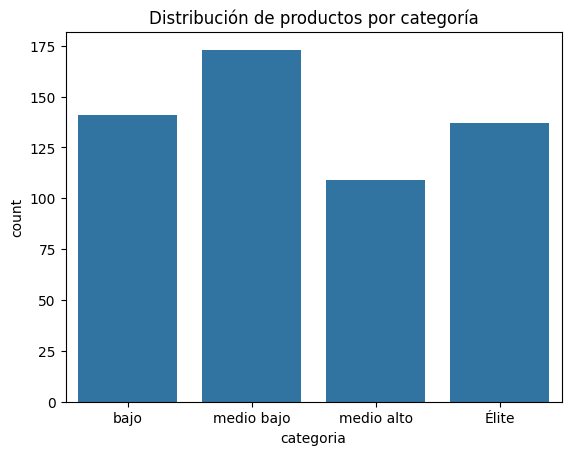

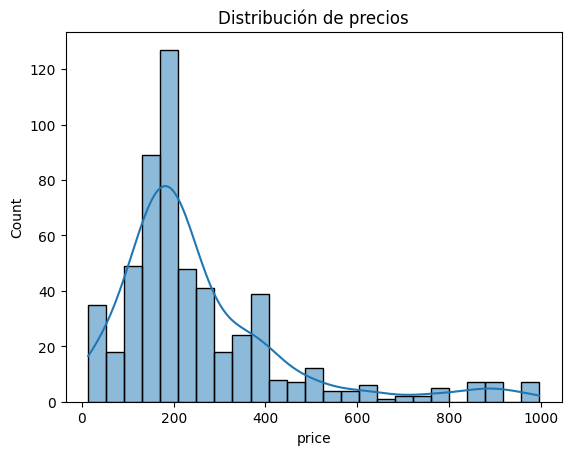

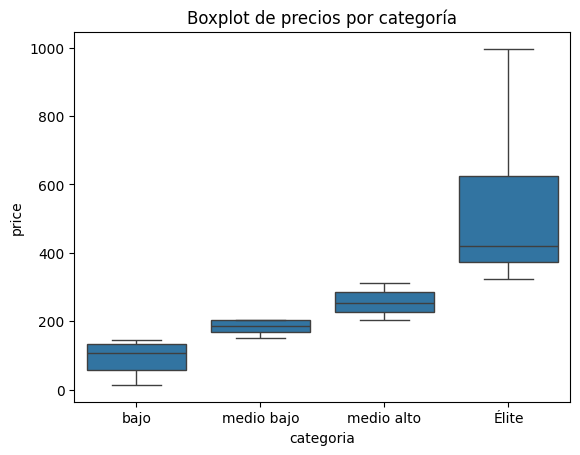

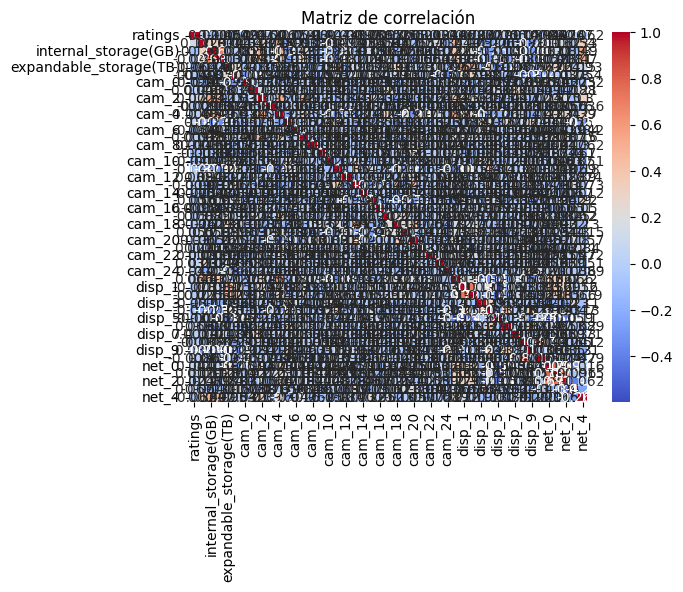

In [ ]:
#2. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

print("Explorando datos...")

# Distribución de categorías
sns.countplot(x='categoria', data=df)
plt.title("Distribución de productos por categoría")
plt.show()

# Distribución de precios
sns.histplot(df['price'], kde=True)
plt.title("Distribución de precios")
plt.show()

# Boxplot precio por categoría
sns.boxplot(x='categoria', y='price', data=df)
plt.title("Boxplot de precios por categoría")
plt.show()

# Correlaciones entre variables numéricas
num_cols = df.select_dtypes(include='number')
if num_cols.shape[1] > 1:
    sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm")
    plt.title("Matriz de correlación")
    plt.show()

In [ ]:
#3. PREPROCESAMIENTO

# Codificar variables categóricas (aunque en este caso hay pocas o ninguna)
df_encoded = df.copy()
le_dict = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

#df_encoded['categoria'] = pd.qcut(df_encoded['price'], q=4, labels=['bajo', 'medio bajo', 'medio alto', 'Élite'])

# Convertir columna 'categoria' a números también (para regresión)
df_encoded['categoria'] = LabelEncoder().fit_transform(df['categoria'])


# Variables para CLASIFICACIÓN (predecir categoría)
X_clf = df_encoded.drop(['categoria','price', 'name','ratings'], axis=1)
y_clf = df_encoded['categoria']


Mejores parámetros encontrados:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.72      0.72      0.72        25
           2       0.70      0.68      0.69        34
           3       0.87      0.83      0.85        24

    accuracy                           0.76       112
   macro avg       0.77      0.76      0.76       112
weighted avg       0.76      0.76      0.76       112

Matriz de confusión:
[[24  0  5  0]
 [ 1 18  3  3]
 [ 6  5 23  0]
 [ 0  2  2 20]]
Accuracy: 0.7589
Accuracy promedio (cross-validation): 0.7232


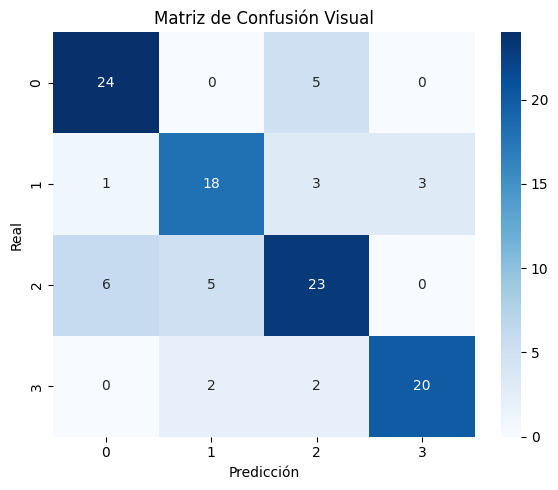

In [ ]:
# 4. MODELO DE CLASIFICACIÓN MEJORADO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dividir datos
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# ----------------------------------------------------------
# GridSearchCV para encontrar mejores hiperparámetros
# ----------------------------------------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(Xc_train, yc_train)

print("Mejores parámetros encontrados:")
print(grid.best_params_)

# Usar el mejor modelo encontrado
clf_model = grid.best_estimator_

# ----------------------------------------------------------
# Evaluar modelo con test set
# ----------------------------------------------------------
y_pred_clf = clf_model.predict(Xc_test)

print("Reporte de clasificación:")
print(classification_report(yc_test, y_pred_clf))

print("Matriz de confusión:")
print(confusion_matrix(yc_test, y_pred_clf))

print("Accuracy:", round(accuracy_score(yc_test, y_pred_clf), 4))

# ----------------------------------------------------------
# Validación cruzada (opcional)
# ----------------------------------------------------------
scores = cross_val_score(clf_model, X_clf, y_clf, cv=5, scoring='accuracy')
print("Accuracy promedio (cross-validation):", round(scores.mean(), 4))

# ----------------------------------------------------------
# Matriz de confusión visual
# ----------------------------------------------------------
cm = confusion_matrix(yc_test, y_pred_clf)
etiquetas = clf_model.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title("Matriz de Confusión Visual")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [ ]:
# 1. Predicciones en train y test
y_train_pred = clf_model.predict(Xc_train)
y_pred_clf

# 2. Creamos la columna 'categoria' vacía
df_encoded['categoria'] = pd.NA

# 3. Asignamos predicciones de train
df_encoded.loc[Xc_train.index, 'categoria'] = y_train_pred

# 4. Asignamos predicciones de test
df_encoded.loc[Xc_test.index,  'categoria'] = y_pred_clf

# ¡Listo! Ahora 'categoria' contiene la predicción para cada fila,
# ya sea que estuviera en train o en test.
# Variables para REGRESIÓN (predecir precio)

X_reg = df_encoded.drop('price', axis=1)
y_reg = df_encoded['price']

X_reg = df_encoded.drop('price', axis=1)
y_reg = df_encoded['price']
X_reg = df_encoded.drop(['price', 'name','ratings'], axis=1)
y_reg = df_encoded['price']

In [ ]:
df_encoded.dtypes

,0
name,int64
ratings,float64
price,float64
internal_storage(GB),float64
storage_ram(GB),float64
expandable_storage(TB),float64
battery,float64
cam_0,int64
cam_1,int64
cam_2,int64


Entrenando modelo de REGRESIÓN (predicción de precio)...
Mejores parámetros encontrados para regresión:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Métricas de evaluación en test set:
 MAE  (Error Medio Absoluto):      41.23
 RMSE (Raíz del Error Cuadrático): 84.24
 R²   (Coeficiente de determinación): 0.7451
MAE promedio (cross-validation): 41.14


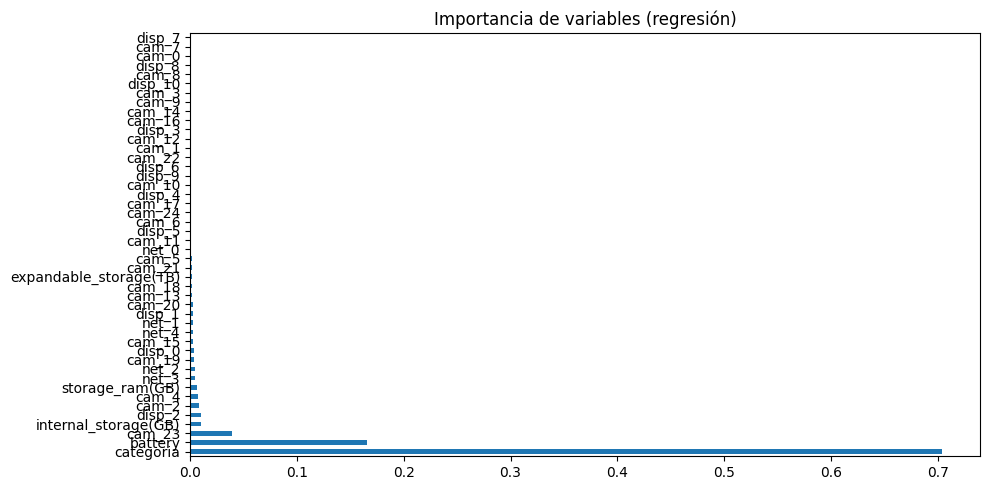

In [ ]:
# 5. MODELO DE REGRESIÓN MEJORADO CON MÉTRICAS

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Entrenando modelo de REGRESIÓN (predicción de precio)...")

# Dividir datos
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# ----------------------------------------------------------
# 🛠️ GridSearchCV para hiperparámetros de regresión
# ----------------------------------------------------------
param_grid_reg = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_reg = GridSearchCV(RandomForestRegressor(random_state=42),
                        param_grid_reg,
                        cv=5,
                        scoring='neg_mean_absolute_error',
                        n_jobs=-1)

grid_reg.fit(Xr_train, yr_train)

print("Mejores parámetros encontrados para regresión:")
print(grid_reg.best_params_)

# Usar mejor modelo
reg_model = grid_reg.best_estimator_

# ----------------------------------------------------------
# Evaluar en test set
# ----------------------------------------------------------
y_pred_reg = reg_model.predict(Xr_test)

mae = mean_absolute_error(yr_test, y_pred_reg)
mse = mean_squared_error(yr_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, y_pred_reg)

print("Métricas de evaluación en test set:")
print(f" MAE  (Error Medio Absoluto):      {mae:.2f}")
print(f" RMSE (Raíz del Error Cuadrático): {rmse:.2f}")
print(f" R²   (Coeficiente de determinación): {r2:.4f}")

# ----------------------------------------------------------
# Validación cruzada (promedio de MAE)
# ----------------------------------------------------------
cv_scores = cross_val_score(reg_model, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f"MAE promedio (cross-validation): {cv_mae:.2f}")

# ----------------------------------------------------------
# Importancia de variables
# ----------------------------------------------------------
importances_reg = pd.Series(reg_model.feature_importances_, index=X_reg.columns)
importances_reg.sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), title="Importancia de variables (regresión)")
plt.tight_layout()
plt.show()

Importancia de variables (clasificación):


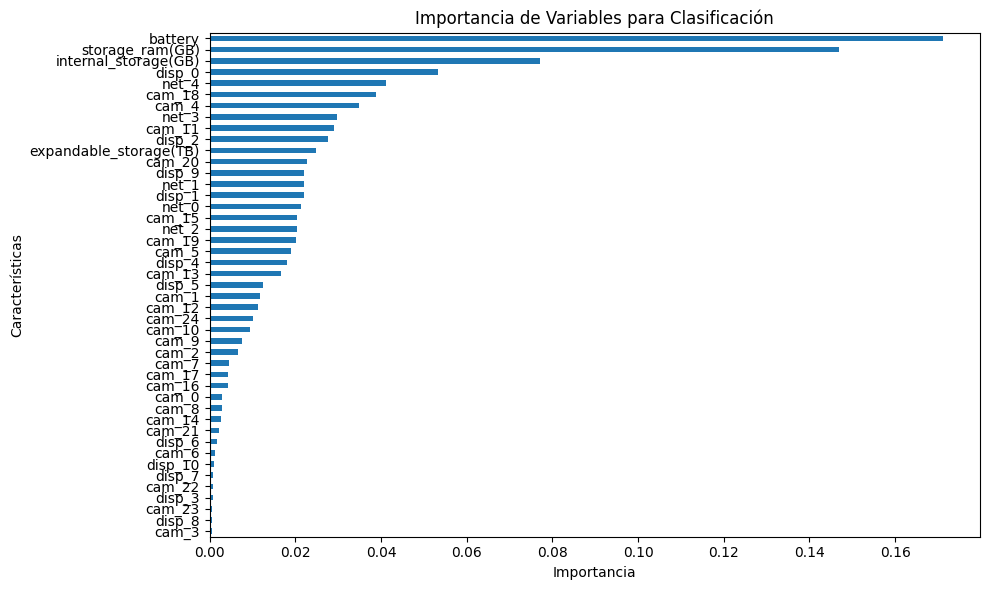

In [ ]:
# 6. IMPORTANCIA DE VARIABLES

print("Importancia de variables (clasificación):")
importances = pd.Series(clf_model.feature_importances_, index=X_clf.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Importancia de Variables para Clasificación')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

In [ ]:
import ast  # Add this import at the top
import pandas as pd
import numpy as np

# 1. Leer el CSV
df_smartphones = pd.read_csv('/content/smartphone_clean-3.csv')

def expand_vector(modelo, col_base, prefix):
    """
    Convierte la columna con strings de listas en columnas binarias separadas.
    - col_base: nombre de la columna (ej. 'vector_camaras')
    - prefix  : prefijo para las nuevas columnas (ej. 'cam')
    """
    # 1) Garantizar lista: si el elemento ya es list, lo deja; si es string, lo evalúa
    def to_list(x):
        if isinstance(x, list):
            return x
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []          # si viene vacío o malformado

    modelo[col_base] = modelo[col_base].apply(to_list)

    # 2) Crear DataFrame con columnas expandidas
    ancho = len(modelo[col_base].iloc[0])           # asume mismo largo en todas las filas
    nuevas = pd.DataFrame(modelo[col_base].tolist(),
                          columns=[f'{prefix}_{i}' for i in range(ancho)],
                          index=modelo.index)  # Changed df.index to modelo.index

    # 3) Concatenar y eliminar la original
    resultado = pd.concat([modelo.drop(columns=[col_base]), nuevas], axis=1)  # Changed df to modelo
    return resultado

# Uso - usando la variable 'modelo' que ya existe
df_smartphones_expandido = expand_vector(df_smartphones, 'vector_camaras',  'cam')
df_smartphones_expandido = expand_vector(df_smartphones_expandido, 'vector_display',  'disp')
df_smartphones_expandido = expand_vector(df_smartphones_expandido, 'vector_network',  'net')

print("Columnas totales:", df_smartphones_expandido.shape[1])
df_smartphones_expandido.head()

Columnas totales: 48


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,NaN,NaN,NaN,256,8,1.0,5000,0,1,0,...,0,0,0,0,0,1,1,1,0,1
1,NaN,NaN,NaN,64,8,0.0,6000,0,0,1,...,0,0,0,0,0,1,1,1,0,1
2,NaN,NaN,NaN,100,12,1.0,4400,0,1,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
df_smartphones_expandido.dtypes

,0
name,float64
ratings,float64
price,float64
internal_storage(GB),int64
storage_ram(GB),int64
expandable_storage(TB),float64
battery,int64
cam_0,int64
cam_1,int64
cam_2,int64


In [ ]:
import pandas as pd
import numpy as np


# Asegúrate que X_clf está definido (las columnas de variables predictoras usadas en tu modelo)
# Aquí debes tenerlo ya definido en tu entorno (por ejemplo, tras entrenar modelos)
# Si no, define manualmente la lista:
# X_clf_cols = [lista de columnas usadas en el entrenamiento]
# Seleccionar las columnas para predicción
X_test = df_smartphones_expandido[X_clf.columns].copy()
# Predecir categoría y precio
#df_smartphones_expandido['categoria'] = pd.qcut(df_smartphones_expandido['price'], q=4, labels=['bajo', 'medio bajo', 'medio alto', 'Élite'])
categoria_predicha = clf_model.predict(X_test)
df_smartphones_expandido['categoria'] = categoria_predicha
X_test2 = df_smartphones_expandido[X_reg.columns].copy()
precio_predicho = reg_model.predict(X_test2)
# Añadir predicciones al DataFrame original
df_smartphones_expandido['categoria_predicha'] = categoria_predicha
df_smartphones_expandido['precio_predicho'] = precio_predicho
# Mostrar resultados con nombre, categoría predicha y precio predicho
print(df_smartphones_expandido[['name', 'categoria_predicha', 'precio_predicho']])
categoria_predicha

   name  categoria_predicha  precio_predicho
0   NaN                   3       487.009712
1   NaN                   2       191.532927
2   NaN                   3       574.973647


array([3, 2, 3])